# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 01: Herramientas Computacionales para Ciencia de Datos </center></h1>

## Instrucciones

- Fecha de publicación: jueves 17 de agosto de 2023.

- Fecha de límite de entrega: lunes 4 de septiembre de 2023, a las 23:59.

- Vía de entrega: Módulo de Tareas en Canvas.

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del canal de Tareas en el Foro del curso en Canvas.


## 1. Objetivos de la Tarea

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidade de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

En los ejercicios a desarrollar a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Como comentamos en clases, el objetivo final de las herramientas en ciencia de datos es poder entender mejor un fenómeno o contestar alguna pregunta relevante. En este caso, queremos entender mejor cómo las cuarentenas impuestas en la Ciudad de Nueva York con motivo de la Pandemia de COVID 19, redujeron la movilidad de las personas en la ciudad. En esa ciudad, entre el 17 de marzo de 2020 y el 14 de mayo del mismo año se implementó una cuarentena, y queremos ver el impacto que tuvo en el uso de algunos sistemas de transporte.

## 2. Datos

Para esta tarea estaremos aprovechando el repositorio abierto de datos de la ciudad de Nueva York. En particular, usaremos la base de datos de viajes en los Taxis Amarillos en la ciudad (Yellow Taxi Trip Records), creada por la Comisión de Taxis y Limosinas de NYC: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### 2.1 Nueva librería

Los datos de esta base, están en formato PARQUET. El formato PARQUET, que es open-source desarrollado por Apache, es un formato eficiente para almacenar y leer bases de datos de gran tamaño. Para poder leer este formato desde Python, deberán instalar una nueva librería llamada ' `pyarrow` '. Para instalarla use el comando:

<code>> conda install pyarrow</code>

Si desea usar sólo Pandas también se pueden leer estos archivos usando la función ' `pd.read_parquet(filename)` '.

### 2.2 Descargar datos

Para esta tarea deberá descargar todos los meses de datos de 2019 y 2020 de los viajes en Taxi Amarillo (Yellow Taxi Trip Records). Esto resultará en 24 archivos PARQUET, uno por cada mes de esos dos años de datos.

### 2.3 Librerias a usar

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [1]:
# Importación de librerías: importe las siguientes librerías, usando alias comunes
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 Base de datos unificada (0.5 puntos)

Cargue los datos descargados en el punto 2.2 y genere un único DataFrame con todos ellos para cada año (uno para 2019 y uno para 2020). Use la función '`pd.concat()`' para unir los DataFrame de cada mes. 

Posteriormente, almacene cada DataFrame en un único archivo. Puede ser un archivo de tipo "pickle" o tipo "parquet". Si lo almacena en un tipo "pickle", puede encontrar información de este tipo de archivos en el siguiente enlace: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html. Si decide almacenarlo en formato "parquet", use la librería '`pyarrow`' para hacerlo, con las funciones '`pa.Table.from_pandas()`' y '`pq.write_table()`'.

Conteste las siguientes preguntas:
- ¿Cuanto espacio en disco usan todos los archivos separados que bajó para 2019 y para 2020?
- ¿Cuánto espacio en disco usa cada uno de los dos archivos creados con los datos agrupados?

In [2]:
#Leer archivos
years = ['2019', '2020']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
trips = {}

# iteración para leer todos los archivos
for y in years:
    trips[y] = pd.DataFrame()
    for m in months:
        # nombre del archivo
        file_name = 'data//yellow_tripdata_' + y + '-' + m + '.parquet'
        # leer a un DataFrame
        trips[y] = pd.concat([trips[y], pd.read_parquet(file_name)])

In [3]:
table = pa.Table.from_pandas(trips['2019'])

In [4]:
pq.write_table(table, 'viajes_2019.parquet', compression='GZIP')

In [5]:
table = pa.Table.from_pandas(trips['2020'])
pq.write_table(table, 'viajes_2020.parquet', compression='GZIP')

Los 12 archivos de 2019 usan 1.15 GB en disco, mientras los 12 archivos de 2020 usan 357 MB. En contraste, los archivos unificados en formato parquet comprimido usan 1.29 GB para 2019 y 393 MB para 2020, usando más espacio que los datos por separado. Si se almacenan en formato pickle, estos datos usan aún más espacio pues no están comprimidos.

### 3.2 Viajes anuales (1 punto)

Inspeccionando los datos de las bases bajadas conteste las siguientes preguntas:

**a)** ¿Cuantos viajes se realizaronen total para 2019 y 2020? (0.5 puntos)

**b)** ¿En qué porcentaje disminuyeron los viajes en 2020 con respecto a 2019? (0.5 puntos)

In [6]:
# Viajes totales
viajes2019 = len(trips['2019'])
viajes2020 = len(trips['2020'])
print(f"En total se realizaron {viajes2019} viajes en taxi en 2019 y {viajes2020} viajes en 2020.")

En total se realizaron 84598444 viajes en taxi en 2019 y 24649092 viajes en 2020.


In [7]:
reduccion = (viajes2019 - viajes2020)/viajes2019
print(f"En 2020 se realizaron un {reduccion*100:.2f}% viajes menos en comparacion a 2019.")

En 2020 se realizaron un 70.86% viajes menos en comparacion a 2019.


### 3.3 Analisis de los viajes (1 punto)

**a)** Elija un mes y un año. ¿Cuál es el viaje más largo y más corto realizado ese mes? ¿Son razonables esos valores? (0.5 puntos)

In [8]:
# Elección
y = '2020'
m = '02'
file_name = 'data//yellow_tripdata_' + y + '-' + m + '.parquet'

viajes_select = pd.read_parquet(file_name)

viajes_select.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0,None
1,1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5,None
2,1,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5,None
3,2,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5,None
4,2,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0,None


In [9]:
viajes_select.sort_values(by='trip_distance',ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
6288875,2,2020-02-24 09:02:00,2020-02-24 10:02:00,NaN,57051.09,NaN,None,95,25,0,48.16,2.75,0.5,0.00,0.00,0.3,51.71,NaN,None
6254657,2,2020-02-04 06:56:00,2020-02-04 07:56:00,NaN,50769.78,NaN,None,29,87,0,35.46,2.75,0.5,0.00,6.12,0.3,45.13,NaN,None
6297107,2,2020-02-28 11:33:00,2020-02-28 12:27:00,NaN,45799.14,NaN,None,236,39,0,34.47,2.75,0.5,0.00,6.12,0.3,44.14,NaN,None
6291150,2,2020-02-25 13:00:00,2020-02-25 13:12:00,NaN,43700.19,NaN,None,244,42,0,30.85,2.75,0.5,0.00,0.00,0.3,34.40,NaN,None
6282482,2,2020-02-20 06:16:00,2020-02-20 06:45:00,NaN,17137.17,NaN,None,225,87,0,25.66,2.75,0.5,0.00,0.00,0.3,29.21,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375176,1,2020-02-26 12:59:20,2020-02-26 13:25:02,1.0,0.00,1.0,N,142,107,1,20.20,0.00,0.5,0.00,0.00,0.3,21.00,0.0,None
3655074,1,2020-02-18 10:54:18,2020-02-18 10:54:18,5.0,0.00,1.0,N,234,264,2,4.00,2.50,0.5,0.00,0.00,0.3,7.30,2.5,None
3157915,1,2020-02-15 12:10:13,2020-02-15 12:10:13,2.0,0.00,1.0,N,211,264,2,2.50,2.50,0.5,0.00,0.00,0.3,5.80,2.5,None
3157868,1,2020-02-15 12:45:47,2020-02-15 12:46:15,0.0,0.00,2.0,N,132,132,3,52.00,0.00,0.5,0.00,0.00,0.3,52.80,0.0,None


Vemos que el viaje más largo fue de 57051 y el más corto fue de 0. En el caso de los viajes más cortos vemos que son de pocos minutos lo cual puede implicar que el pasajero/a canceló el viaje al inicio. Los viajes más largos no hacen sentido pues son viajes de miles de millas en una hora o menos.

**b)** Limpie los datos del mes seleccionado para dejar sólo aquellos que tienen alguna distancia recorrida y al menos un pasajero. Con esta base filtrada, ¿Cuál es el viaje más largo y más corto realizado ese mes? ¿Son razonables esos nuevos valores? (0.5 puntos)

In [10]:
viajes_select_limpios = viajes_select[(viajes_select.passenger_count>0) & (viajes_select.trip_distance>0)]

viajes_select_limpios.sort_values(by='trip_distance',ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1582817,2,2020-02-08 08:58:50,2020-02-08 15:03:36,3.0,369.94,3.0,N,48,265,2,960.5,0.0,0.0,0.00,0.00,0.3,960.80,0.0,None
2424311,1,2020-02-12 11:36:07,2020-02-12 17:43:11,2.0,274.50,3.0,N,48,100,1,735.5,0.0,0.0,149.51,11.75,0.3,897.06,0.0,None
4570790,2,2020-02-22 13:36:40,2020-02-22 17:11:56,1.0,207.11,1.0,N,208,265,2,531.5,0.0,0.5,0.00,0.00,0.3,532.30,0.0,None
5686805,1,2020-02-27 18:59:56,2020-02-27 22:46:57,1.0,206.60,5.0,N,140,265,1,740.0,0.0,0.0,60.00,0.00,0.3,800.30,0.0,None
3833324,2,2020-02-19 09:01:22,2020-02-19 11:50:11,2.0,166.07,5.0,N,70,265,1,400.0,0.0,0.0,30.00,12.54,0.3,442.84,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075055,2,2020-02-29 11:00:08,2020-02-29 11:00:12,4.0,0.01,1.0,N,262,262,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30,0.0,None
4663814,2,2020-02-22 21:30:46,2020-02-22 21:31:05,2.0,0.01,2.0,N,163,163,2,52.0,0.0,0.5,0.00,0.00,0.3,55.30,2.5,None
2054941,2,2020-02-10 16:01:02,2020-02-10 16:01:05,1.0,0.01,1.0,N,132,132,2,2.5,1.0,0.5,0.00,0.00,0.3,4.30,0.0,None
2526731,2,2020-02-12 19:14:06,2020-02-12 19:14:16,1.0,0.01,2.0,N,163,163,2,52.0,4.5,0.5,0.00,0.00,0.3,59.80,2.5,None


### 3.4 Análisis de pasajeros (2 puntos)

El lugar más importante en términos de tomar y dejar pasajeros en NYC es el aeropuerto internacional JFK. Este se encuentra la zona con el ID 132 como vimos en clases.

<img style="width: 400px" src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_queens.jpg">


**a)** ¿Cuál es el total de pasajeros tomados en la zona 132 en abril de 2019? (0.5 puntos)

In [11]:
trips_132 = trips['2019'][(trips['2019']['tpep_pickup_datetime'].dt.month == 4) & (trips['2019']['PULocationID'] == 132)]
trips_132.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
259834,2,2019-04-12 22:20:07,2019-04-13 14:01:19,1.0,17.86,2.0,N,132,233,1,52.0,0.0,0.5,15.26,5.76,0.3,76.32,2.5,None
6153489,2,2019-04-14 23:32:54,2019-04-15 07:26:56,2.0,18.38,2.0,N,132,113,1,52.0,0.0,0.5,12.21,5.76,0.3,73.27,2.5,None
7828089,2,2019-04-01 00:06:26,2019-04-01 00:37:09,2.0,13.36,1.0,N,132,225,2,39.0,0.5,0.5,0.00,0.00,0.3,40.30,0.0,None
7831889,2,2019-04-01 00:00:58,2019-04-01 00:25:40,2.0,11.04,1.0,N,132,61,1,32.5,0.5,0.5,5.00,0.00,0.3,38.80,0.0,None
13,2,2019-04-01 00:14:55,2019-04-01 00:42:23,1.0,18.50,4.0,N,132,265,1,65.5,0.5,0.5,13.36,0.00,0.3,80.16,0.0,None


In [12]:
trips_132['passenger_count'].sum()

375221.0

**b)** ¿Cuál es el total de pasajeros tomados en la zona 132 en abril de 2020? (0.5 puntos)

In [13]:
trips_132 = trips['2020'][(trips['2020']['tpep_pickup_datetime'].dt.month == 4) & (trips['2020']['PULocationID'] == 132)]
trips_132.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
20,2,2020-04-01 00:20:26,2020-04-01 00:27:09,1.0,2.94,1.0,N,132,10,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0,NaN
81,1,2020-04-01 00:20:42,2020-04-01 00:27:55,1.0,5.90,1.0,N,132,28,2,17.0,0.5,0.5,0.00,0.0,0.3,18.30,0.0,NaN
89,2,2020-04-01 00:45:37,2020-04-01 00:47:05,1.0,0.00,1.0,N,132,132,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
94,2,2020-04-01 00:02:30,2020-04-01 00:14:35,1.0,4.77,1.0,N,132,139,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,0.0,NaN
104,2,2020-04-01 00:46:16,2020-04-01 01:03:28,1.0,11.73,1.0,N,132,138,1,32.0,0.5,0.5,6.66,0.0,0.3,39.96,0.0,NaN


In [14]:
trips_132['passenger_count'].sum()

2052.0

**c)** Genere un DataFrame que tenga los pasajeros totales tomados en la zona 132 por día para 2019 y otro para 2020. Asegúrese que las fechas estén en el rango correcto para cada año pues algunos de los archivos tienen errores de fechas.(0.5 puntos)

In [15]:
trips_132_2019 = trips['2019'][(trips['2019']['PULocationID'] == 132) & (trips['2019']['tpep_pickup_datetime'].dt.year == 2019)][["tpep_pickup_datetime", "passenger_count"]]
trips_132_2019.head()

,tpep_pickup_datetime,passenger_count
33,2019-01-01 00:08:20,2.0
68,2019-01-01 00:35:25,1.0
70,2019-01-01 00:04:06,4.0
132,2019-01-01 00:39:58,2.0
141,2019-01-01 00:11:27,5.0


In [16]:
pasajeros_2019 = trips_132_2019.groupby(trips_132_2019['tpep_pickup_datetime'].dt.day_of_year)['passenger_count'].sum()

In [17]:
trips_132_2020 = trips['2020'][(trips['2020']['PULocationID'] == 132) & (trips['2020']['tpep_pickup_datetime'].dt.year == 2020)][["tpep_pickup_datetime", "passenger_count"]]
trips_132_2020.head()

,tpep_pickup_datetime,passenger_count
131,2020-01-01 00:53:21,1.0
218,2020-01-01 00:46:19,1.0
238,2020-01-01 00:21:13,1.0
291,2020-01-01 00:30:59,1.0
303,2020-01-01 00:46:10,1.0


In [18]:
pasajeros_2020 = trips_132_2020.groupby(trips_132_2020['tpep_pickup_datetime'].dt.day_of_year)['passenger_count'].sum()

**d)** Grafique ambas series en el mismo gráfico para poder comparar las fechas entre un año y otro. Preocúpese de ponerle etiquetas al gráfico para identificar cada serie y una leyenda donde se muestre cada una. (0.5 puntos)

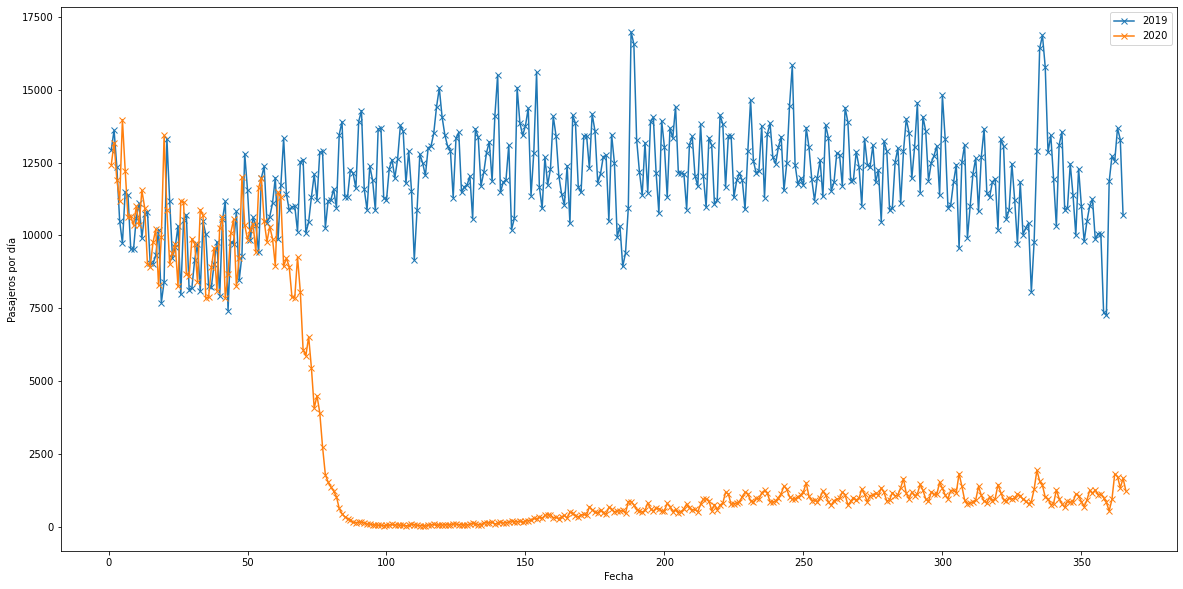

In [19]:
fig = plt.figure(figsize=(20,10))
plt.plot(pasajeros_2019, 'x-', label='2019')
plt.plot(pasajeros_2020, 'x-', label='2020')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Pasajeros por día')
plt.show()

### 3.5 Análisis de zonas (1.5 puntos)

Usando los datos de ambos años conteste las siguientes preguntas.

**a)** ¿Cuál es la zona que tuvo la mayor reducción de pasajeros diarios entre abril de 2019 y abril de 2020? (0.3 puntos)

In [20]:
# viajes por zona en 2019
trips_1904 = trips['2019'][(trips['2019']['tpep_pickup_datetime'].dt.month == 4)][['PULocationID','passenger_count']]
trips_1904.head()

,PULocationID,passenger_count
2811659,144,1.0
2811660,144,1.0
2825249,148,1.0
2825250,90,1.0
3270572,164,1.0


In [21]:
trips_by_loc_2019 = trips_1904.groupby("PULocationID").sum()
trips_by_loc_2019.head()

,passenger_count
PULocationID,
1,958.0
2,5.0
3,173.0
4,20398.0
5,30.0


In [22]:
# viajes por zona en 2020
trips_2004 = trips['2020'][(trips['2020']['tpep_pickup_datetime'].dt.month == 4)][['PULocationID','passenger_count']]
trips_2004.head()

,PULocationID,passenger_count
4222375,43,1.0
2806082,229,3.0
2806083,68,3.0
2806084,48,3.0
6230312,41,3.0


In [23]:
trips_by_loc_2020 = trips_2004.groupby("PULocationID").sum()
trips_by_loc_2020.head()

,passenger_count
PULocationID,
1,9.0
3,12.0
4,278.0
5,0.0
6,6.0


In [24]:
# calculo de reducción
trips_by_loc_2019['passenger_count_20'] = trips_by_loc_2020
# eliminacion de NaN
trips_by_loc_2019 = trips_by_loc_2019.fillna(0)
# calculo de reducción
trips_by_loc_2019['reduccion'] = (trips_by_loc_2019['passenger_count'] - trips_by_loc_2019['passenger_count_20'])/trips_by_loc_2019['passenger_count']
trips_by_loc_2019.head()

,passenger_count,passenger_count_20,reduccion
PULocationID,,,
1,958.0,9.0,0.990605
2,5.0,0.0,1.000000
3,173.0,12.0,0.930636
4,20398.0,278.0,0.986371
5,30.0,0.0,1.000000


In [25]:
# zona con mayor reducción
trips_by_loc_2019.iloc[trips_by_loc_2019['reduccion'].argmax()]

passenger_count       5.0
passenger_count_20    0.0
reduccion             1.0
Name: 2, dtype: float64

**b)** ¿Cuál es la zona que tuvo la menor reducción de pasajeros diarios entre abril de 2019 y abril de 2020? (0.2 puntos)

In [26]:
# zona con menor reducción
trips_by_loc_2019.iloc[trips_by_loc_2019['reduccion'].argmin()]

passenger_count       13.000000
passenger_count_20    21.000000
reduccion             -0.615385
Name: 115, dtype: float64

**c)** En la página de NYC, descargue el archivo "Taxi Zone Shapefile" que contiene el mapa con las zonas de NYC. Genere una imagen con el mapa de NYC en que las zonas tengan un color dependiendo de la reducción de pasajeros entre abril de 2019 y 2020. (1.0 puntos) 

In [27]:
#Leer datos de zonas
taxi_zones = gpd.read_file('data/taxi_zones.shp', driver='SHP')
taxi_zones = taxi_zones.set_index('LocationID')
taxi_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
LocationID,,,,,,
1,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
2,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
3,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
4,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
5,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...
259,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
260,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
261,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."


Text(0.5, 1.0, 'Zonas de NYC')

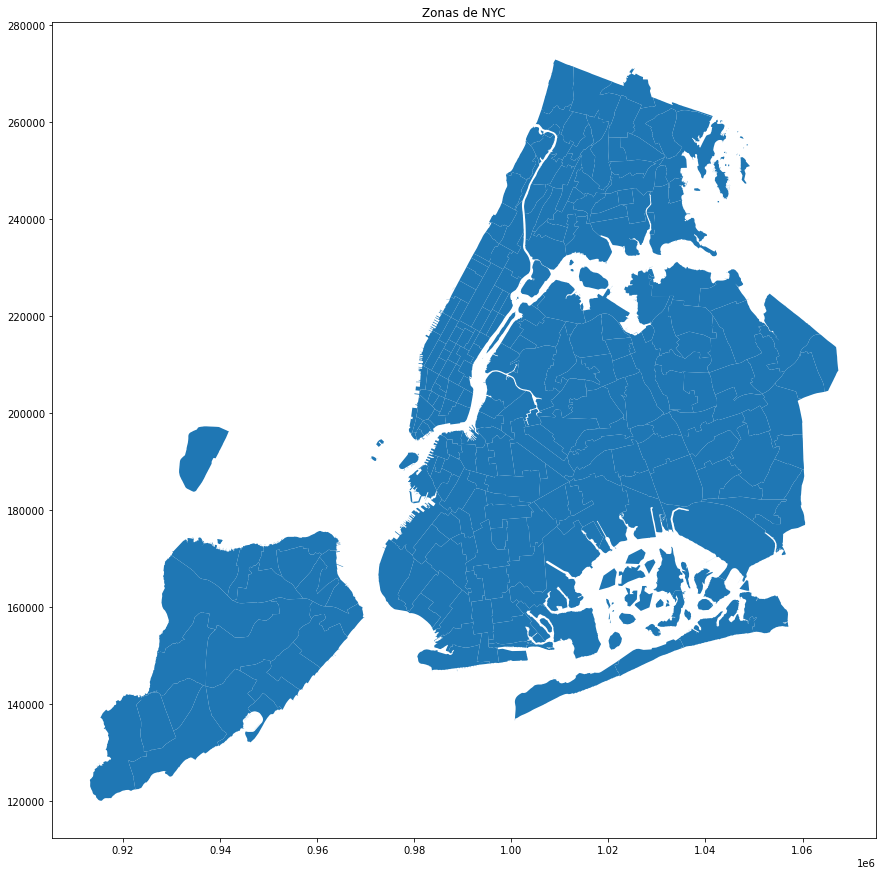

In [28]:
taxi_zones.plot(figsize=(15,15))
plt.title('Zonas de NYC')

In [29]:
taxi_zones['reduccion'] = trips_by_loc_2019['reduccion']
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry,reduccion
LocationID,,,,,,,
1,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",0.990605
2,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",1.000000
3,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",0.930636
4,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",0.986371
5,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",1.000000


Text(0.5, 1.0, 'Reducción de Pasajeros por Zona')

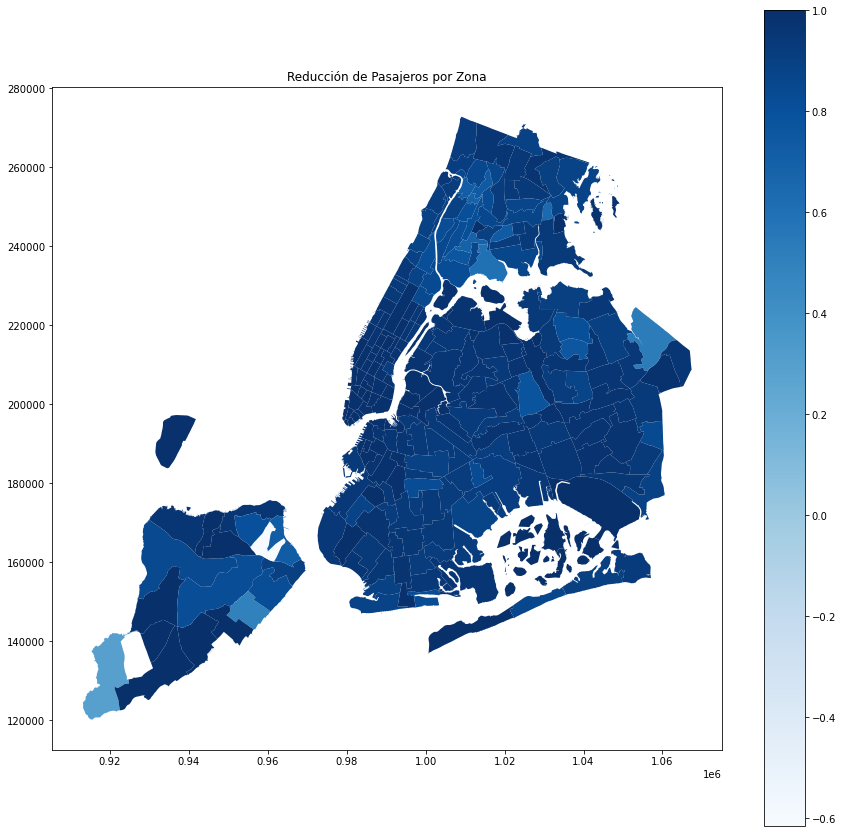

In [30]:
taxi_zones.plot(figsize=(15,15), column='reduccion', cmap='Blues', legend=True)
plt.title('Reducción de Pasajeros por Zona')